# NB 2 | EDA & Feature Engineering
---
### Project:
Amazon Reviews Analysis (DSC 400)

### Dataset: 
Original: SAHITYA SAHU Amazon Large Dataset (~123GB)

Sampled & Cleaned: Amazon_FE_Dataset.csv (129794, 13)

### NB Objective:
Perform feature engineering and EDA on the cleaned Amazon Review dataset.

**Tasks:**
1. Load Cleaned Dataset
2. Initial EDA
   - Detailed Understanding
4. Feature Engineering
   - Test-Based Features
   - Other Features
5. EDA
   - Distributions
   - Relationships
   - Trends & potential anomalies
   - Generate plots

## Setup
---

In [1]:
#Must
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Text Processing
import re
import string

#Sentiment scores
from textblob import TextBlob

#NLP
from collections import Counter

## Load & Verify
---

In [2]:
#Load the cleaned CSV
df_master = pd.read_csv("Amazon_Master_Cleaned.csv")

#Shape
print("Shape:", df_master.shape)

Shape: (129794, 13)


## Initial EDA | Basic Overview of Data
---

### Overview
Rows & Columns: 129,794 rows x 13 columns

Target Variable: `overall` rating
(Predicting rating from review text/features)

Missing Values: 
With many missing: `image` & `style`
With few: `summary`, `reviewerName`, & `reviewText`

Summary Stats:
- Ratings (`overall`)
  - Mean: 4.25, median: 5, & max:5
  - (Most reviewers are higher rated)
- `review_lenth`
  - Min:Max | 1:21,242
  - Median: 103 (most reviews are short)

| Feature    | Description | Missing |
|------------|-------------|---------|
| `overall`  | Rating given by reviewer|
| `verified` | If purchase was verified |
| ` reviewTime`| Date of review | 
| `asin` | Unique product identifer |
| `reviewerName` | Name of reviewer | 23|
| `reviewText` | Full text of review | 3|
| `summary` | Summary of teh review | 35|
| `unixReviewTime ` | Timestamp of review |
| `vote` | Number of helpful votes |
| `image` | Img attached to review |127,382|
| `style` | Product style info | 81,282|
| `review_length` | Number of characters in `reviewText` |


In [3]:
#Preview master dataset
print("Dataset Shape:", df_master.shape)
print("\nData Types and Null Counts:")
print(df_master.info())

#Review
df_master.head()

Dataset Shape: (129794, 13)

Data Types and Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129794 entries, 0 to 129793
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         129794 non-null  int64  
 1   verified        129794 non-null  bool   
 2   reviewTime      129794 non-null  object 
 3   reviewerID      129794 non-null  object 
 4   asin            129794 non-null  object 
 5   reviewerName    129771 non-null  object 
 6   reviewText      129791 non-null  object 
 7   summary         129759 non-null  object 
 8   unixReviewTime  129794 non-null  int64  
 9   vote            129794 non-null  float64
 10  image           2412 non-null    object 
 11  style           48512 non-null   object 
 12  review_length   129794 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 12.0+ MB
None


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,review_length
0,4,True,2017-05-09,A2VY416R3G7WD9,B0012XPRO8,Becky Ann Hathaway,i really liked this product. never really bou...,super soft,1494288000,0.0,NaN,{'Color:': ' Lavender'},130
1,4,True,2016-06-25,A3CHVIU4GFE180,B00J9MJDFS,Anais,Have not used this item but a couple of times....,Nice product to have as it does several things...,1466812800,2.0,NaN,NaN,117
2,4,True,2014-10-10,AT5L0D757JA4W,B0054EU4Z8,Luxdelux,Great cap but it doesn't really stay on my hea...,Four Stars,1412899200,0.0,NaN,{'Color:': ' Black'},66
3,5,True,2013-03-03,A30X02Q6TP9G3N,B003CU26SY,sag412,I read this would help with my thinning edges....,Great!,1362268800,0.0,NaN,{'Size:': ' One size'},281
4,5,True,2017-03-01,A2V16V9O1JR53A,B01GOY8LBA,N P Hoca,My dad needed this bucket. He is 94 and in a...,"But he LOVED THIS, and told everyone how great...",1488326400,5.0,NaN,NaN,439


In [4]:
#Missing values
missing_summary = df_master.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_summary)

Missing values per column:
image             127382
style              81282
summary               35
reviewerName          23
reviewText             3
overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
unixReviewTime         0
vote                   0
review_length          0
dtype: int64


In [5]:
#Summary stats
df_master.describe()

,overall,unixReviewTime,vote,review_length
count,129794.000000,1.297940e+05,129794.000000,129794.000000
mean,4.253563,1.448326e+09,1.032490,195.418948
std,1.274055,5.845880e+07,14.384971,344.357509
min,1.000000,9.476352e+08,0.000000,1.000000
25%,4.000000,1.419811e+09,0.000000,37.000000
50%,5.000000,1.458259e+09,0.000000,103.000000
75%,5.000000,1.488931e+09,0.000000,218.000000
max,5.000000,1.538352e+09,2950.000000,21242.000000


## Feature Engineering
---
Text-based Sentiment:
- `sentiment_polarity`: Sentiment score of review text (-1 to 1)
- `sentiment_subjectivity`: Objective- 0, Subjective-1

Image Recognizer:
- `has_image`: If review includes image

Temporal Features:
- `review_year`: Year from `reviewTime`
- `review_month`: Month from `reviewTime`
- `review_dayofweek`: Day of week (Mon: 0- Sun:6)

Reviewer & Product:
- `reviews_per_reviewer`: Count of total reviews reviewer has written
- `reviews_per_product`: Count of total reviews for product
- `avg_rating_product`: Avg rating of product from all reviewers
- `avg_rating_reviewer`: Avg rating given by reviewers from all products

In [6]:
#Text-Based Features

#Word count
df_master['word_count'] = df_master['reviewText'].apply(lambda x: len(str(x).split()))

#Sentence count
df_master['sentence_count'] = df_master['reviewText'].apply(lambda x: len(str(x).split('.')))

#Avg word length
df_master['avg_word_length'] = df_master.apply(
    lambda row: row['review_length']/row['word_count'] if row['word_count'] > 0 else 0, axis=1
)

#Summary length
df_master['summary_length'] = df_master['summary'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

#Sentiment scores 
df_master['sentiment_polarity'] = df_master['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df_master['sentiment_subjectivity'] = df_master['reviewText'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

In [7]:
#Reviewer/Product/Image Features

#Add has image
df_master['has_image'] = df_master['image'].notnull().astype(int)

#Extract year, month, day from `reviewTime`
df_master['reviewTime'] = pd.to_datetime(df_master['reviewTime'], errors='coerce')
df_master['review_year'] = df_master['reviewTime'].dt.year
df_master['review_month'] = df_master['reviewTime'].dt.month
df_master['review_dayofweek'] = df_master['reviewTime'].dt.dayofweek

#Reviews per:

#Reviewer
reviews_per_reviewer = df_master.groupby('reviewerID')['reviewerID'].transform('count')
df_master['reviews_per_reviewer'] = reviews_per_reviewer

#Product
reviews_per_product = df_master.groupby('asin')['asin'].transform('count')
df_master['reviews_per_product'] = reviews_per_product

#Avg rating per product
avg_rating_product = df_master.groupby('asin')['overall'].transform('mean')
df_master['avg_rating_product'] = avg_rating_product

#Avg rating per reviewer
avg_rating_reviewer = df_master.groupby('reviewerID')['overall'].transform('mean')
df_master['avg_rating_reviewer'] = avg_rating_reviewer

In [8]:
#Review FE
print("New DataFrame shape:", df_master.shape)
df_master.head()

New DataFrame shape: (129794, 27)


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,sentiment_polarity,sentiment_subjectivity,has_image,review_year,review_month,review_dayofweek,reviews_per_reviewer,reviews_per_product,avg_rating_product,avg_rating_reviewer
0,4,True,2017-05-09,A2VY416R3G7WD9,B0012XPRO8,Becky Ann Hathaway,i really liked this product. never really bou...,super soft,1494288000,0.0,...,0.250000,0.500000,0,2017,5,1,1,5,4.0,4.0
1,4,True,2016-06-25,A3CHVIU4GFE180,B00J9MJDFS,Anais,Have not used this item but a couple of times....,Nice product to have as it does several things...,1466812800,2.0,...,0.300000,0.500000,0,2016,6,5,1,1,4.0,4.0
2,4,True,2014-10-10,AT5L0D757JA4W,B0054EU4Z8,Luxdelux,Great cap but it doesn't really stay on my hea...,Four Stars,1412899200,0.0,...,0.400000,0.450000,0,2014,10,4,1,5,2.6,4.0
3,5,True,2013-03-03,A30X02Q6TP9G3N,B003CU26SY,sag412,I read this would help with my thinning edges....,Great!,1362268800,0.0,...,-0.150000,0.708333,0,2013,3,6,1,4,4.0,5.0
4,5,True,2017-03-01,A2V16V9O1JR53A,B01GOY8LBA,N P Hoca,My dad needed this bucket. He is 94 and in a...,"But he LOVED THIS, and told everyone how great...",1488326400,5.0,...,0.417593,0.620370,0,2017,3,2,1,1,5.0,5.0


In [9]:
df_master.to_csv('Amazon_FE_Dataset.csv', index=False)

## Substantial EDA | Visualizations & Insights
---

Key Notes:

Rating counts
|Rating | Count|
|-------|------|
|1      |11245 |
|2      | 5627 |
|3      | 8707 |
|4      |17608 |
|5      | 86607|

Verified purchase counts
|T/F | Purachse Count |
|----|----------------|
| True | 115943 |
| False | 13851 |

Reviews wt Images: 2412

In [10]:
#Key categorical features

#Distribution of ratings
print("Rating counts:")
print(df_master['overall'].value_counts().sort_index())

#Purchase counts
print("\nVerified purchase counts:")
print(df_master['verified'].value_counts())

#Check: how many reviews have images
print("\nReviews with images:")
print(df_master['has_image'].sum())

Rating counts:
overall
1    11245
2     5627
3     8707
4    17608
5    86607
Name: count, dtype: int64

Verified purchase counts:
verified
True     115943
False     13851
Name: count, dtype: int64

Reviews with images:
2412


### Basic Level Visuals
---
Visuals & Brief Discoveries

| Plot | Discovery |
|------|-----------|
|Distribution of Ratings| 5-star dominates |
|Review Length vs Rating| 5-star: have longer, more consistent review lengths & 1-4 star(s): are shorter on average and show more variability|
|Sentiment Polarity by Rating | 5-stars: show the widest variation in polarity, 1-star: mostly negative with some outliers, 2-4 stars: gradual increase in median sentiment polarity|
|Reviews per Product Distribution| Most products have few reviews, but a small number of products have many reviews |
|Reviews per Reviewer Distribution| Most reviewers have few reviews, a very small number of reviewers have many reviews |
|Rating Distribution Pie Chart | 5 domiantes: 66.7%|
|Verified vs Non-Verified Purchases| True dominates|
|Reviews with and without images |Without images dominates|
|Review Length Histogram |Number of characters exceeds 10K|
|Average Sentiment Polarity Histogram| Neutral-positive dominates, some negative|
|Reviews Over Years |Peak 2016|
|Top 5 Products by Number of Reviews |Most 300|
|Top 5 Reviewers by Number of Reviews |Most 8|

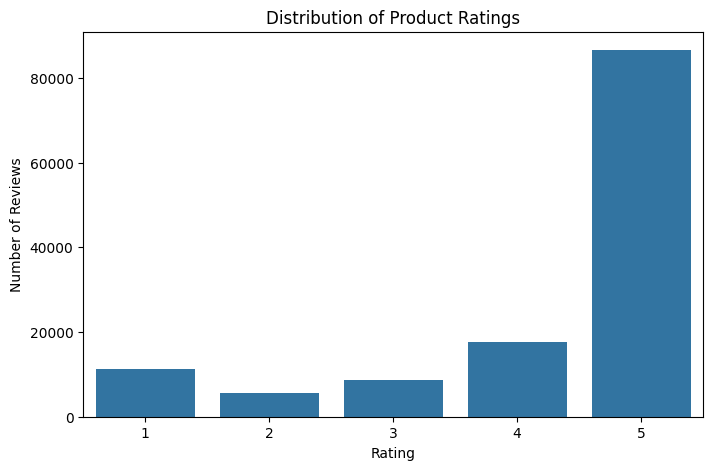

In [11]:
# Distribution of Ratings

plt.figure(figsize=(8,5))
sns.countplot(x='overall', data=df_master, order=sorted(df_master['overall'].unique()))
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

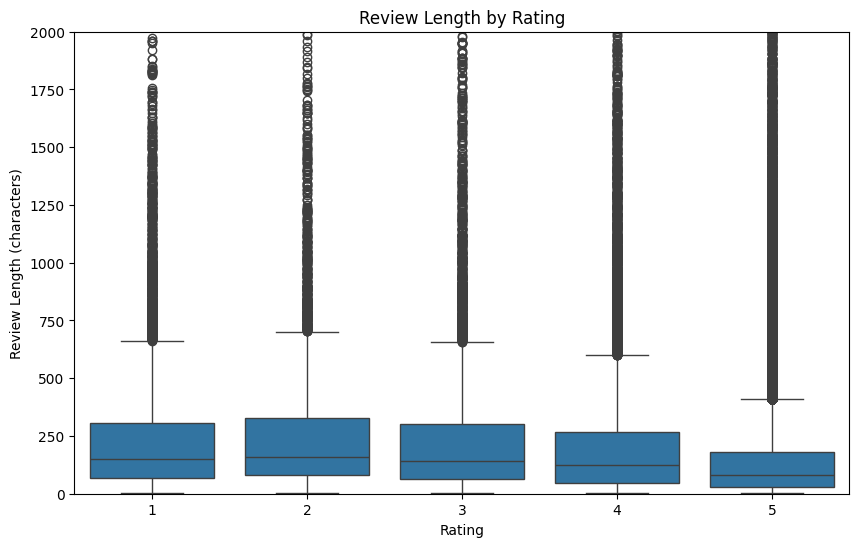

In [12]:
#Review Length vs Rating

plt.figure(figsize=(10,6))
sns.boxplot(x='overall', y='review_length', data=df_master)
plt.title("Review Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Review Length (characters)")
plt.ylim(0, 2000)
plt.show()

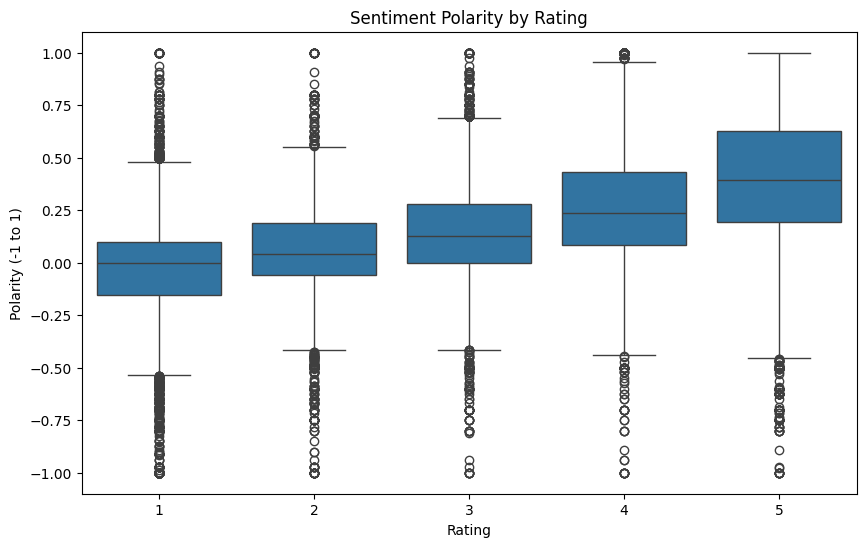

In [13]:
#Sentiment Polarity by Rating

plt.figure(figsize=(10,6))
sns.boxplot(x='overall', y='sentiment_polarity', data=df_master)
plt.title("Sentiment Polarity by Rating")
plt.xlabel("Rating")
plt.ylabel("Polarity (-1 to 1)")
plt.show()

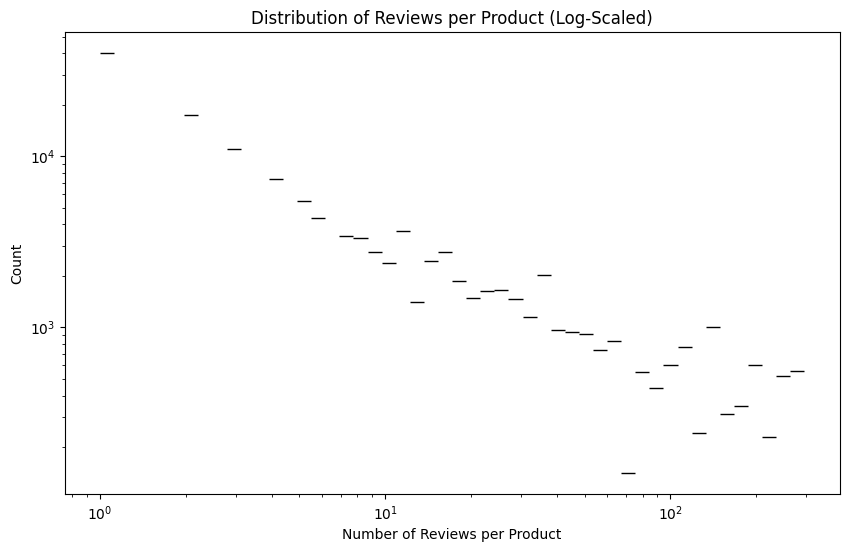

In [14]:
#Reviews per Product Distribution

plt.figure(figsize=(10,6))
sns.histplot(df_master['reviews_per_product'], bins=50, log_scale=(True, True))
plt.title("Distribution of Reviews per Product (Log-Scaled)")
plt.xlabel("Number of Reviews per Product")
plt.ylabel("Count")
plt.show()

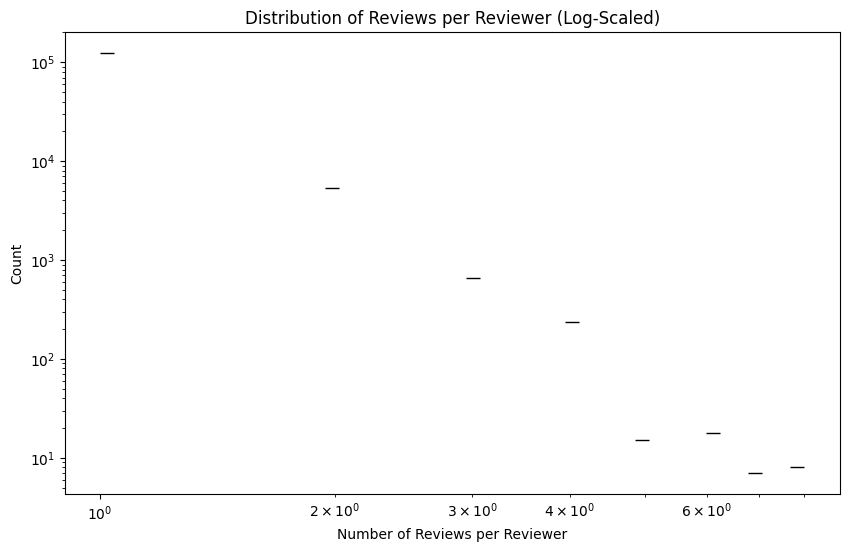

In [15]:
#Reviews per Reviewer Distribution

plt.figure(figsize=(10,6))
sns.histplot(df_master['reviews_per_reviewer'], bins=50, log_scale=(True, True))
plt.title("Distribution of Reviews per Reviewer (Log-Scaled)")
plt.xlabel("Number of Reviews per Reviewer")
plt.ylabel("Count")
plt.show()

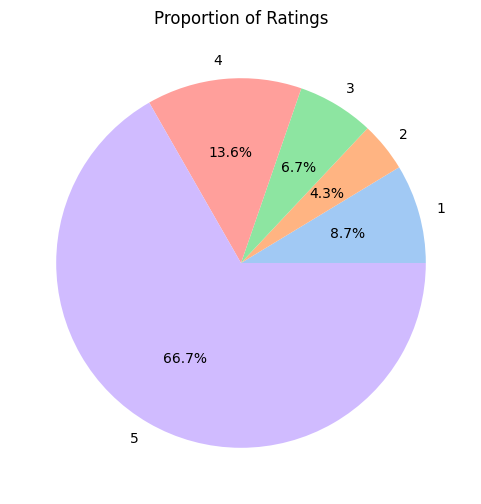

In [16]:
#Rating Distribution Pie Chart

plt.figure(figsize=(6,6))
df_master['overall'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Proportion of Ratings")
plt.ylabel("")
plt.show()

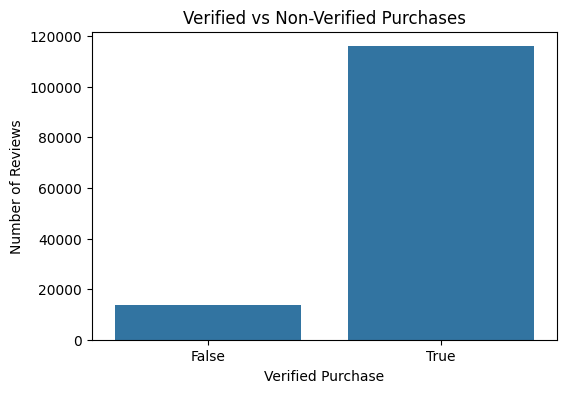

In [17]:
#Verified vs Non-Verified Purchases

plt.figure(figsize=(6,4))
sns.countplot(x='verified', data=df_master)
plt.title("Verified vs Non-Verified Purchases")
plt.xlabel("Verified Purchase")
plt.ylabel("Number of Reviews")
plt.show()

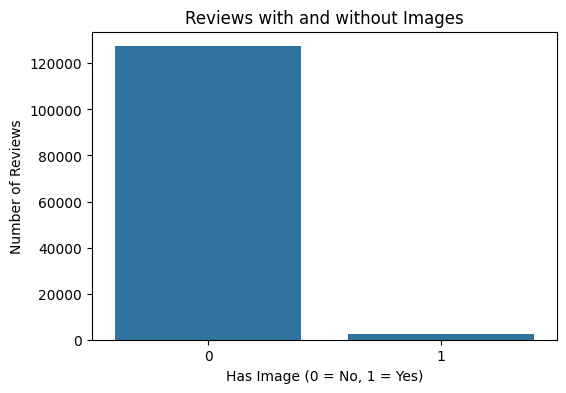

In [18]:
#Reviews with and without images

plt.figure(figsize=(6,4))
sns.countplot(x='has_image', data=df_master)
plt.title("Reviews with and without Images")
plt.xlabel("Has Image (0 = No, 1 = Yes)")
plt.ylabel("Number of Reviews")
plt.show()

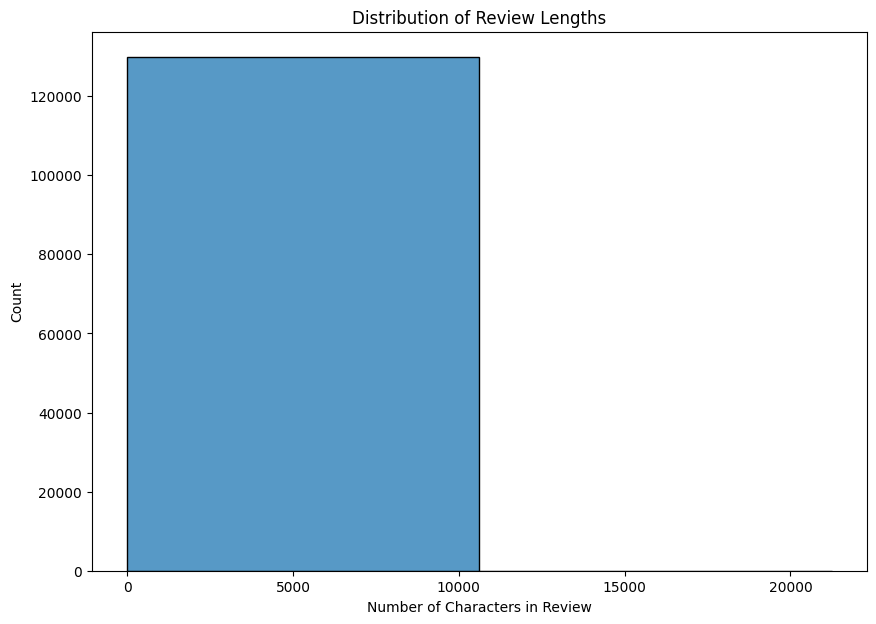

In [19]:
#Review Length Histogram

plt.figure(figsize=(10,7))
sns.histplot(df_master['review_length'], bins=2, kde=False)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Characters in Review")
plt.ylabel("Count")
plt.show()

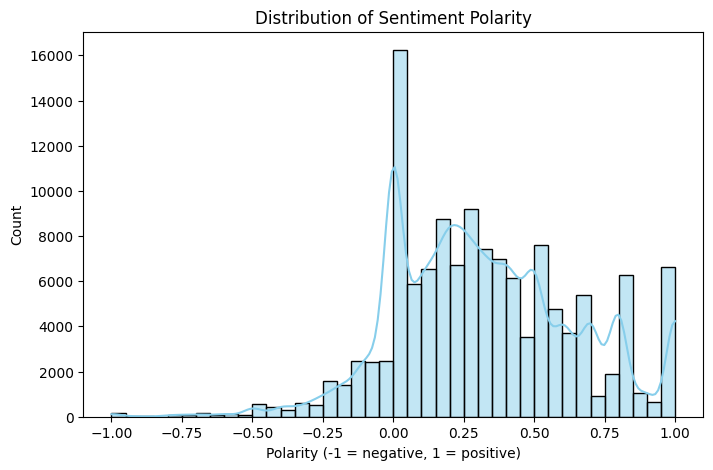

In [20]:
#Average Sentiment Polarity Histogram

plt.figure(figsize=(8,5))
sns.histplot(df_master['sentiment_polarity'], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Sentiment Polarity")
plt.xlabel("Polarity (-1 = negative, 1 = positive)")
plt.ylabel("Count")
plt.show()

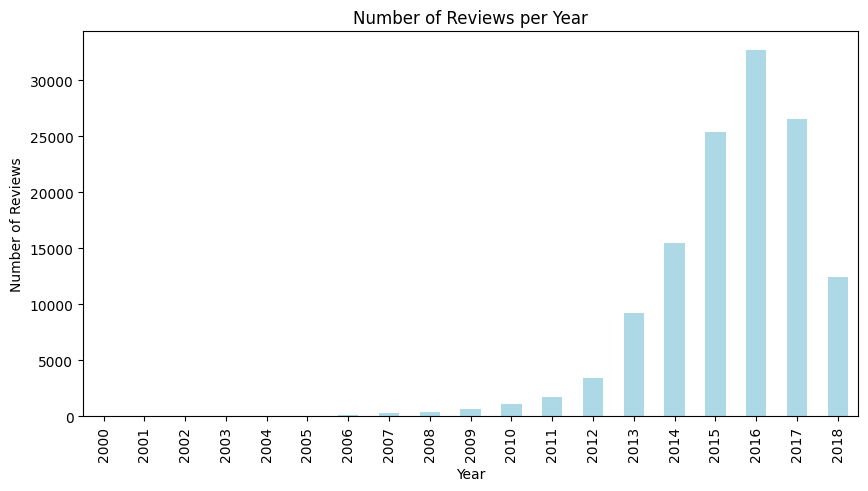

In [21]:
#Reviews Over Years

plt.figure(figsize=(10,5))
df_master['review_year'].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title("Number of Reviews per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()

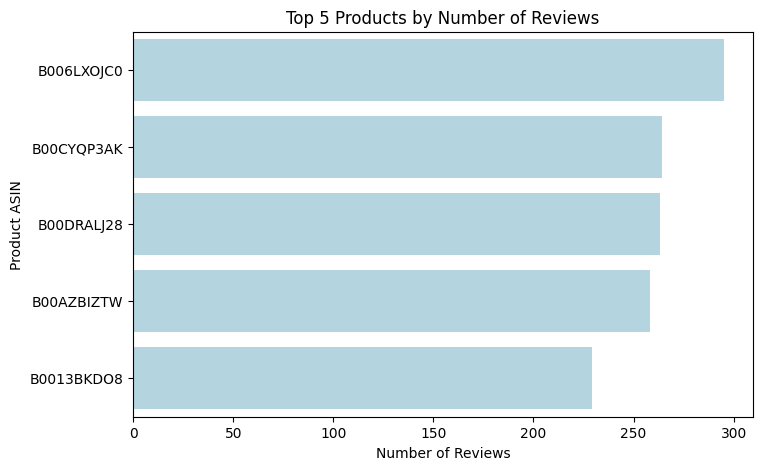

In [22]:
#Top 5 Products by Number of Reviews

top_products = df_master['asin'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, color='lightblue')
plt.title("Top 5 Products by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Product ASIN")
plt.show()

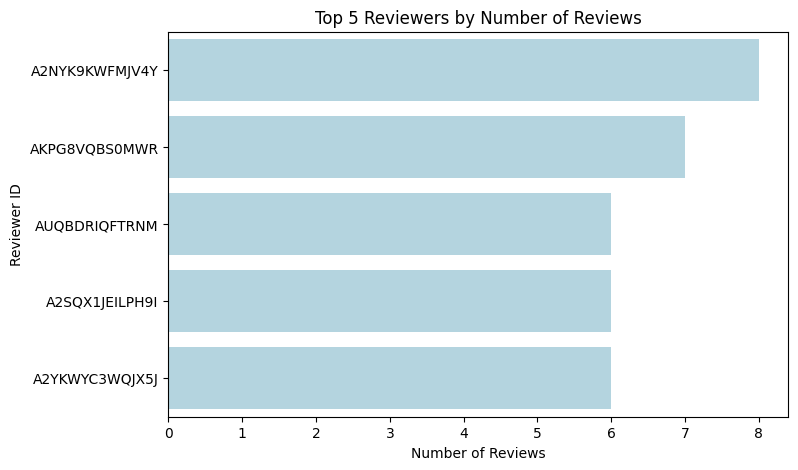

In [23]:
#Top 5 Reviewers by Number of Reviews

top_reviewers = df_master['reviewerID'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_reviewers.values, y=top_reviewers.index, color='lightblue')
plt.title("Top 5 Reviewers by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Reviewer ID")
plt.show()

In [25]:
#For Modeling
df_master.to_csv(r"C:\Users\lynnm\Downloads\Amazon_FE_Dataset_clean.csv", index=False)